In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Kyphosis is the abnormality of the spine
## Age of patient in months
## Number of vertebrae affected 
## Start - ing at vertebrae

In [2]:
df  = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
df.sort_values(by=['Age'], ascending=False)

,Kyphosis,Age,Number,Start
73,absent,206,4,10
66,absent,195,2,17
75,absent,178,4,15
49,absent,177,2,14
17,absent,175,5,13
...,...,...,...,...
13,absent,1,4,12
15,absent,1,3,16
36,absent,1,3,9
5,absent,1,2,16


In [4]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [5]:
df.corr()

,Age,Number,Start
Age,1.000000,-0.016687,0.057828
Number,-0.016687,1.000000,-0.425099
Start,0.057828,-0.425099,1.000000


<Figure size 864x648 with 0 Axes>

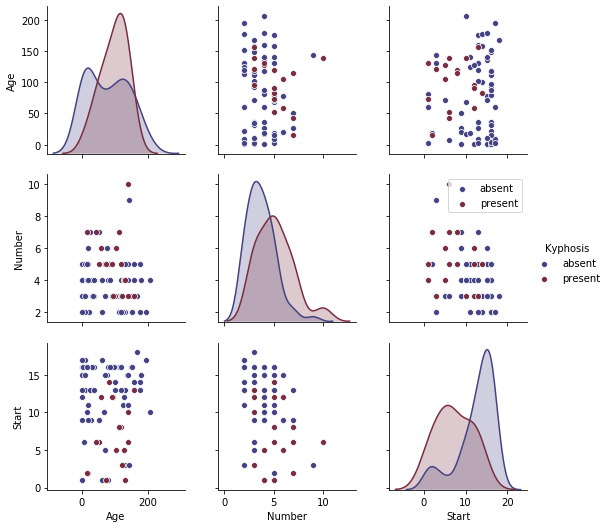

In [6]:
plt.figure(figsize=(12,9))
sns.pairplot(df,hue='Kyphosis', palette='icefire')
plt.legend()

In [7]:
df[df['Age'] > 12].count()

Kyphosis    68
Age         68
Number      68
Start       68
dtype: int64

In [8]:
68/81

0.8395061728395061

## 83% of the patients are 1 year or older

In [9]:
206/12


17.166666666666668

## The highest age is 17 years old which means measured till 18 as a teen....

In [10]:
#Convert Age from months to years

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [12]:
#df.loc[df['Kyphosis','absent']== 0, df['Kyphosis', 'present']==1]
df.replace('absent', 0, inplace=True)
df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,present,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,present,157,3,13
77,0,26,7,13
78,0,120,2,13
79,present,42,7,6


In [13]:
df.replace('present', 1, inplace=True)
df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null int64
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(4)
memory usage: 2.7 KB


In [15]:
df.tail()

,Kyphosis,Age,Number,Start
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6
80,0,36,4,13


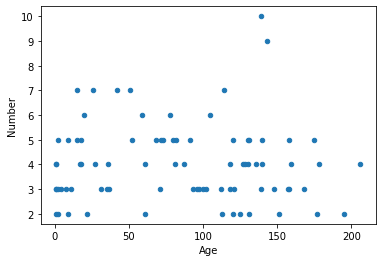

In [16]:
df.plot(kind='scatter',x='Age',y='Number')

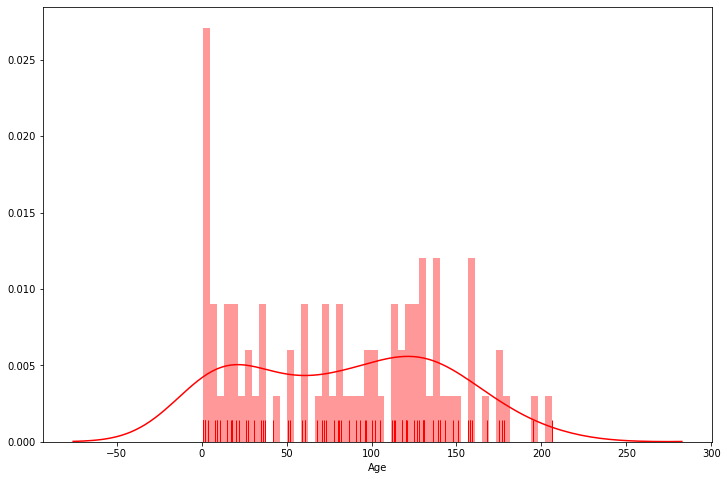

In [329]:
plt.figure(figsize=(12,8))
sns.distplot(df['Age'], bins=50, rug=True, color='red')
#plt.legend()

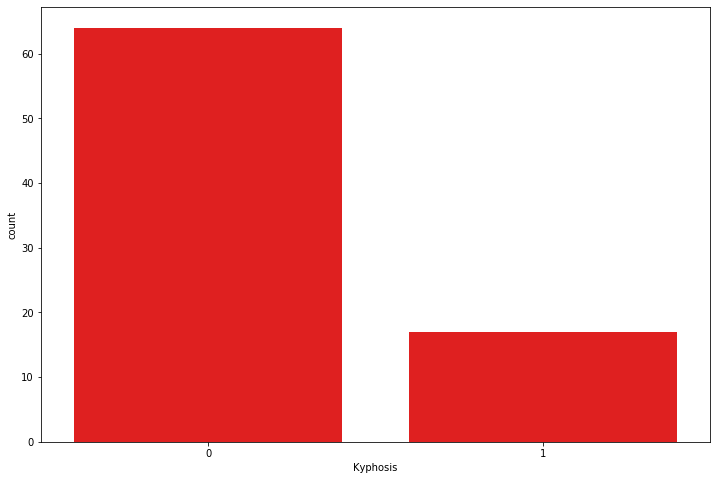

In [330]:
plt.figure(figsize=(12,8))
sns.countplot(df['Kyphosis'], color='red')

In [17]:
df.groupby(['Kyphosis']).mean()


,Age,Number,Start
Kyphosis,,,
0,79.890625,3.750000,12.609375
1,97.823529,5.176471,7.294118


## On average it is present in 8 year olds

In [19]:
df[df['Kyphosis'] == 1].count()

Kyphosis    17
Age         17
Number      17
Start       17
dtype: int64

## Kyphosis is present in 20% of the data

In [20]:
X = df.drop(['Kyphosis'], axis=1)
y = df['Kyphosis']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtree = DecisionTreeClassifier()

In [24]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
dpred = dtree.predict(X_test)


In [26]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,dpred))
print('\n')
print(classification_report(y_test, dpred))


[[12  5]
 [ 6  2]]


              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [27]:
from sklearn.ensemble import RandomForestClassifier

randt = RandomForestClassifier(n_estimators=500)

In [28]:
randt.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
randpred = randt.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
print(confusion_matrix(y_test, randpred))
print('\n')
print(classification_report(y_test,randpred))


[[17  0]
 [ 6  2]]


              precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



## Lets try using the Loistic Regression Model

In [48]:
from sklearn.linear_model import LogisticRegression 

In [56]:
logr = LogisticRegression()

In [57]:
logr.fit(X_train,y_train)

C:\Users\Andile\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
predlog = linr.predict(X_test)

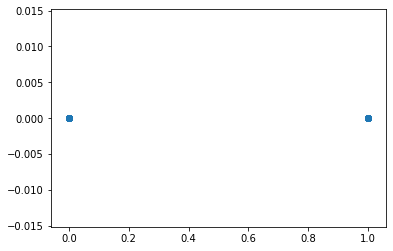

In [62]:
plt.scatter(y_test, predlin)

In [53]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predlin))
print('MSE:', metrics.mean_squared_error(y_test, predlin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predlin)))

MAE: 0.32
MSE: 0.32
RMSE: 0.565685424949238


- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [54]:
print(confusion_matrix(y_test, predlin))
print('\n')
print(classification_report(y_test,predlin))

[[17  0]
 [ 8  0]]


              precision    recall  f1-score   support

           0       0.68      1.00      0.81        17
           1       0.00      0.00      0.00         8

    accuracy                           0.68        25
   macro avg       0.34      0.50      0.40        25
weighted avg       0.46      0.68      0.55        25



C:\Users\Andile\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier(n_neighbors=1)

In [75]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [76]:
kpred = knn.predict(X_test)

In [77]:
print(confusion_matrix(y_test,kpred ))
print('\n')
print(classification_report(y_test,kpred))

[[16  1]
 [ 6  2]]


              precision    recall  f1-score   support

           0       0.73      0.94      0.82        17
           1       0.67      0.25      0.36         8

    accuracy                           0.72        25
   macro avg       0.70      0.60      0.59        25
weighted avg       0.71      0.72      0.67        25

